# Web Scrapping for True Pilot Review

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from time import sleep
from google.colab import files

In [ ]:
base_url = "https://uk.trustpilot.com/review/getabound.com"


headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}

In [ ]:
reviews = []
def scrape_page(url):
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        print(f"Failed to retrieve page: {url} (Status Code: {response.status_code})")
        return False

    soup = BeautifulSoup(response.content, "html.parser")
    review_elements = soup.find_all(name="p", class_="typography_body-l__v5JLj")



    # for i in review_elements:
    #   print(i.getText())

    if not review_elements:
        print("No more reviews found. Stopping.")
        return False

    for review in review_elements:
        reviews.append(review.get_text(strip=True))

    # print(reviews)

    return True



In [ ]:
page_num = 0
max_pages = 50 # adjust as needed


while page_num <= max_pages:
    url = f"{base_url}?page={page_num}" if page_num > 1 else base_url
    print(f"Scraping page {page_num}...")
    if not scrape_page(url):
        break
    if page_num == 0:
      page_num +=2
    else:
      page_num += 1
    sleep(2)


df = pd.DataFrame({"Review": reviews})


print("Preview of scraped reviews:")
print(df.head())

Scraping page 0...
Scraping page 2...
Scraping page 3...
Scraping page 4...
Scraping page 5...
Scraping page 6...
Scraping page 7...
Scraping page 8...
Scraping page 9...
Scraping page 10...
Scraping page 11...
Scraping page 12...
Scraping page 13...
Scraping page 14...
Scraping page 15...
Scraping page 16...
Scraping page 17...
Scraping page 18...
Scraping page 19...
Scraping page 20...
Scraping page 21...
Scraping page 22...
Scraping page 23...
Scraping page 24...
Scraping page 25...
Scraping page 26...
Scraping page 27...
Scraping page 28...
Scraping page 29...
Scraping page 30...
Scraping page 31...
Scraping page 32...
Scraping page 33...
Scraping page 34...
Scraping page 35...
Scraping page 36...
Scraping page 37...
Scraping page 38...
Scraping page 39...
Scraping page 40...
Scraping page 41...
Scraping page 42...
Scraping page 43...
Scraping page 44...
Scraping page 45...
Scraping page 46...
Scraping page 47...
Scraping page 48...
Scraping page 49...
Scraping page 50...
Preview o

In [ ]:
csv_file = "abound_trustpilot_reviews_only.csv"
df = df.drop_duplicates()
df.to_csv(csv_file, index=False)
print(f"Scraping complete! Total reviews scraped: {len(df)}")

Scraping complete! Total reviews scraped: 867


# Pre-Processing the data

In [ ]:
import pandas as pd
import re
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk


nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')


csv_file = "abound_trustpilot_reviews_only.csv"
df = pd.read_csv(csv_file)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:


review_column = 'Review'


stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function for NLP preprocessing
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove numbers
    text = re.sub(r'\d+', '', text)  # Remove all numerical values

    # Remove punctuation and special characters (except emojis)
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenize text
    tokens = nltk.word_tokenize(text)

    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    # Join tokens back into a single string
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text



In [ ]:
df['preprocessed_text'] = df[review_column].apply(preprocess_text)

# Save the preprocessed DataFrame to a new CSV file
preprocessed_file = "abound_trustpilot_reviews_preprocessed.csv"
df.to_csv(preprocessed_file, index=False)

print("NLP preprocessing complete! Preprocessed data saved to:", preprocessed_file)

NLP preprocessing complete! Preprocessed data saved to: abound_trustpilot_reviews_preprocessed.csv


In [ ]:

import matplotlib.pyplot as plt
from wordcloud import WordCloud

def get_sentiment(text):
    analysis = TextBlob(str(text))
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

df['sentiment'] = df['preprocessed_text'].apply(get_sentiment)

# Sentiment Distribution
sentiment_distribution = df['sentiment'].value_counts()
print("Sentiment Distribution:")
print(sentiment_distribution)

Sentiment Distribution:
sentiment
Positive    800
Neutral      47
Negative     20
Name: count, dtype: int64


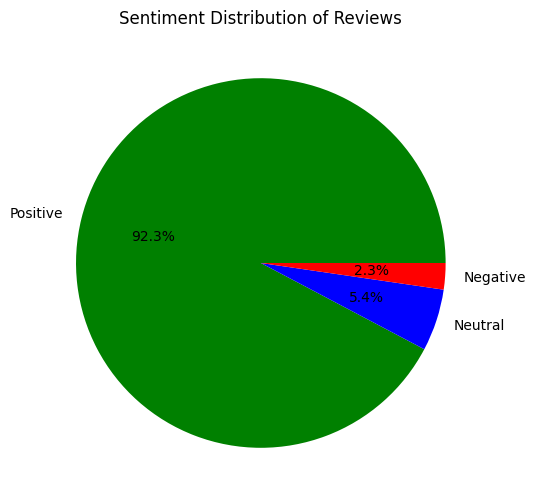

In [ ]:
plt.figure(figsize=(8, 6))
sentiment_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['green', 'blue', 'red'])
plt.title('Sentiment Distribution of Reviews')
plt.ylabel('')
plt.show()

In [ ]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 40.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 18.1 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1


In [ ]:
!pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 23.7 MB/s eta 0:00:00


In [ ]:
from gensim import corpora
from gensim.models import LdaModel
from gensim.utils import simple_preprocess
import pyLDAvis.gensim_models
from collections import Counter

In [ ]:
preprocessed_file = "abound_trustpilot_reviews_preprocessed.csv"
df = pd.read_csv(preprocessed_file)

# Ensure the DataFrame has a column with the preprocessed reviews (e.g., 'preprocessed_text')
preprocessed_column = 'preprocessed_text'  # Adjust this to match your CSV column name

df[preprocessed_column] = df[preprocessed_column].astype(str)
# Tokenize the preprocessed text
tokenized_reviews = [simple_preprocess(review) for review in df[preprocessed_column]]

# Create a dictionary and corpus for LDA
dictionary = corpora.Dictionary(tokenized_reviews)
corpus = [dictionary.doc2bow(review) for review in tokenized_reviews]

# Train the LDA model
lda_model = LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Print the topics
print("Top 5 Topics:")
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx}: {topic}")

# Visualize the topics using pyLDAvis
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

Top 5 Topics:
Topic 0: 0.031*"forward" + 0.027*"straight" + 0.019*"much" + 0.015*"check" + 0.014*"abound" + 0.014*"money" + 0.013*"within" + 0.013*"account" + 0.012*"process" + 0.011*"easy"
Topic 1: 0.044*"service" + 0.043*"good" + 0.031*"great" + 0.018*"fast" + 0.018*"easy" + 0.017*"customer" + 0.017*"loan" + 0.016*"process" + 0.015*"experience" + 0.013*"abound"
Topic 2: 0.087*"easy" + 0.050*"quick" + 0.038*"process" + 0.028*"fast" + 0.025*"simple" + 0.019*"application" + 0.017*"apply" + 0.017*"helpful" + 0.015*"great" + 0.015*"straightforward"
Topic 3: 0.037*"process" + 0.026*"service" + 0.024*"application" + 0.023*"loan" + 0.021*"fast" + 0.016*"excellent" + 0.016*"easy" + 0.016*"quick" + 0.016*"recommend" + 0.014*"experience"
Topic 4: 0.052*"quick" + 0.038*"easy" + 0.029*"loan" + 0.024*"service" + 0.023*"abound" + 0.012*"process" + 0.011*"recommend" + 0.010*"highly" + 0.010*"thank" + 0.009*"great"


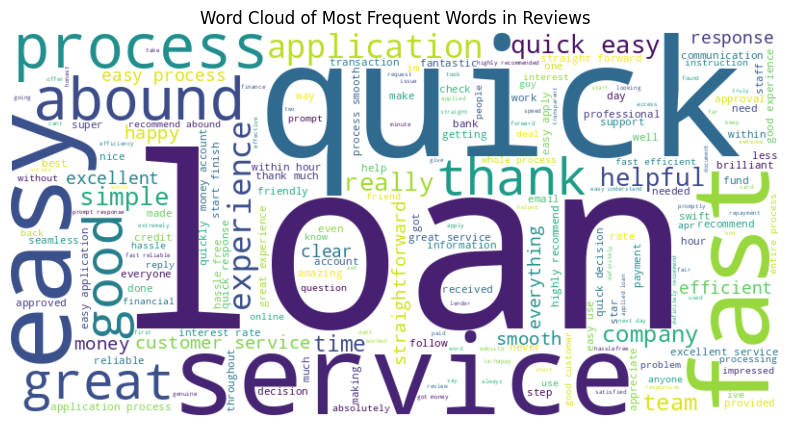

In [ ]:
df['preprocessed_text'] = df[review_column].apply(preprocess_text)


all_reviews = ' '.join(df['preprocessed_text'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Frequent Words in Reviews')
plt.show()

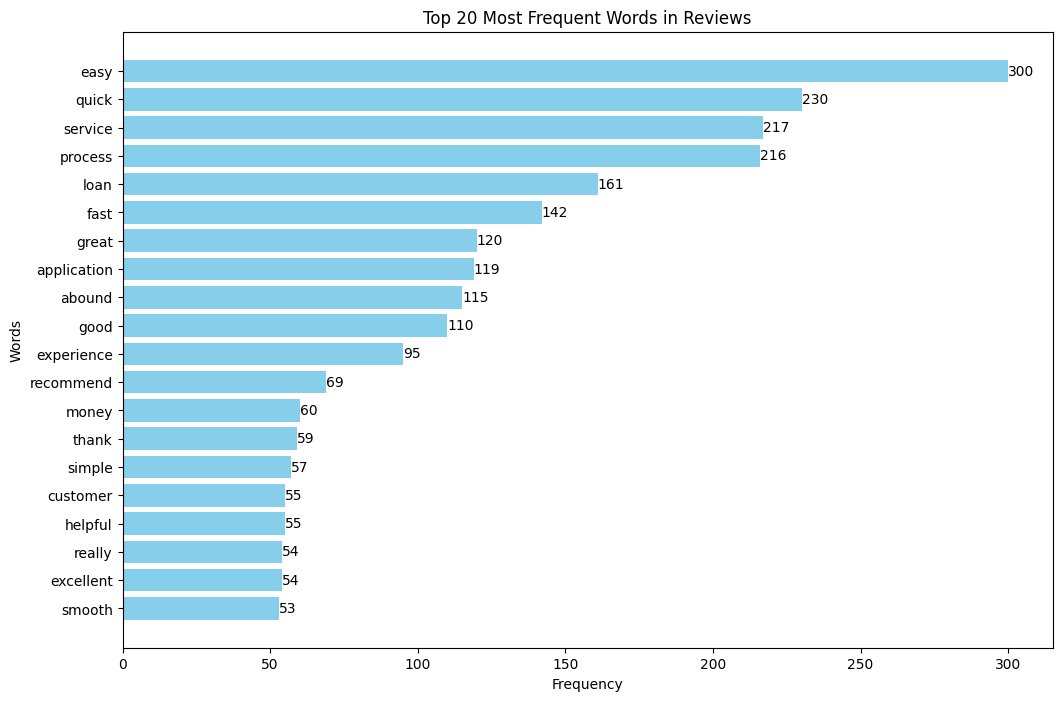

In [ ]:
all_tokens = []
for review in df[preprocessed_column]:
    tokens = nltk.word_tokenize(review)
    all_tokens.extend(tokens)

# Count word frequencies
word_freq = Counter(all_tokens)

# Get the top 20 most common words
top_words = word_freq.most_common(20)

# Separate words and their frequencies for plotting
words = [word for word, freq in top_words]
frequencies = [freq for word, freq in top_words]

# Create a bar graph
plt.figure(figsize=(12, 8))
plt.barh(words, frequencies, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 20 Most Frequent Words in Reviews')


for index, value in enumerate(frequencies):
    plt.text(value, index, str(value), va='center')

plt.gca().invert_yaxis()  # Invert y-axis to show the most frequent word at the top
plt.show()